# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 559


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&units=imperial&appid={weather_api_key}'
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | suva
Processing Record 4 of Set 1 | nagqu
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | kristiansund
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | aasiaat
Processing Record 16 of Set 1 | aral
Processing Record 17 of Set 1 | fale old settlement
Processing Record 18 of Set 1 | gueltat zemmour
City not found. Skipping...
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | pokhara
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | edinburgh of t

Processing Record 40 of Set 4 | malpura
Processing Record 41 of Set 4 | sao joao da barra
Processing Record 42 of Set 4 | tolanaro
Processing Record 43 of Set 4 | branson
Processing Record 44 of Set 4 | choibalsan
Processing Record 45 of Set 4 | hermanus
Processing Record 46 of Set 4 | nadym
Processing Record 47 of Set 4 | palikir - national government center
Processing Record 48 of Set 4 | udachny
Processing Record 49 of Set 4 | puerto san jose
Processing Record 0 of Set 5 | lata
Processing Record 1 of Set 5 | ulsteinvik
Processing Record 2 of Set 5 | murzuq
Processing Record 3 of Set 5 | boditi
Processing Record 4 of Set 5 | nema
Processing Record 5 of Set 5 | stefan voda
Processing Record 6 of Set 5 | mangrol
Processing Record 7 of Set 5 | road town
Processing Record 8 of Set 5 | youkounkoun
Processing Record 9 of Set 5 | ajdabiya
Processing Record 10 of Set 5 | tual
Processing Record 11 of Set 5 | klyuchi
Processing Record 12 of Set 5 | alma
Processing Record 13 of Set 5 | atafu vi

Processing Record 34 of Set 8 | luena
Processing Record 35 of Set 8 | san vicente de canete
Processing Record 36 of Set 8 | port augusta
Processing Record 37 of Set 8 | tucumcari
Processing Record 38 of Set 8 | lakeway
Processing Record 39 of Set 8 | bardaskan
City not found. Skipping...
Processing Record 40 of Set 8 | kolondieba
Processing Record 41 of Set 8 | bondo
Processing Record 42 of Set 8 | egilsstadir
Processing Record 43 of Set 8 | kitimat
Processing Record 44 of Set 8 | kombissiri
Processing Record 45 of Set 8 | pyt-yakh
Processing Record 46 of Set 8 | zaozersk
Processing Record 47 of Set 8 | langepas
Processing Record 48 of Set 8 | constantia
Processing Record 49 of Set 8 | alenquer
Processing Record 0 of Set 9 | puerto aysen
Processing Record 1 of Set 9 | trincomalee
Processing Record 2 of Set 9 | rosarito
Processing Record 3 of Set 9 | lagoa
Processing Record 4 of Set 9 | marolambo
Processing Record 5 of Set 9 | angaur state
Processing Record 6 of Set 9 | puerto madryn
Pr

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          537
Lat           537
Lng           537
Max Temp      537
Humidity      537
Cloudiness    537
Wind Speed    537
Country       537
Date          537
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,52.18,82,89,5.99,ZA,1690155180
1,bredasdorp,-34.5322,20.0403,49.69,72,59,5.97,ZA,1690155179
2,suva,-18.1416,178.4415,78.28,69,75,3.44,FJ,1690155228
3,nagqu,31.5000,92.0000,39.96,94,100,3.78,CN,1690155203
4,thompson,55.7435,-97.8558,71.76,40,20,12.66,CA,1690155179


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,52.18,82,89,5.99,ZA,1690155180
1,bredasdorp,-34.5322,20.0403,49.69,72,59,5.97,ZA,1690155179
2,suva,-18.1416,178.4415,78.28,69,75,3.44,FJ,1690155228
3,nagqu,31.5000,92.0000,39.96,94,100,3.78,CN,1690155203
4,thompson,55.7435,-97.8558,71.76,40,20,12.66,CA,1690155179


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

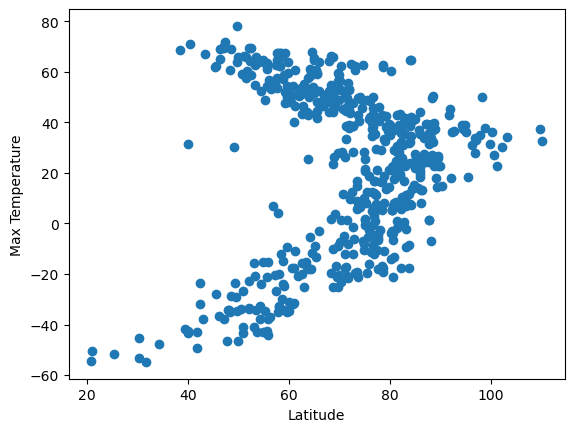

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

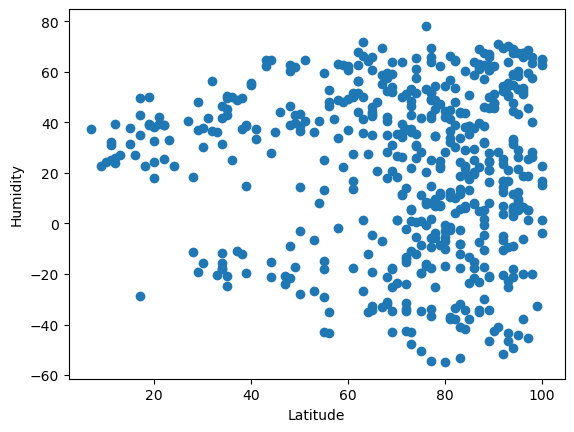

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

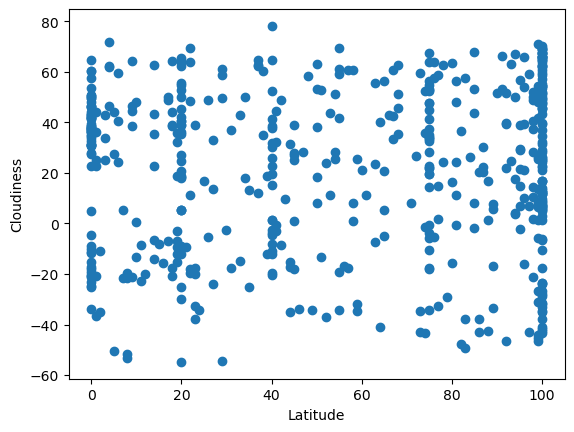

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

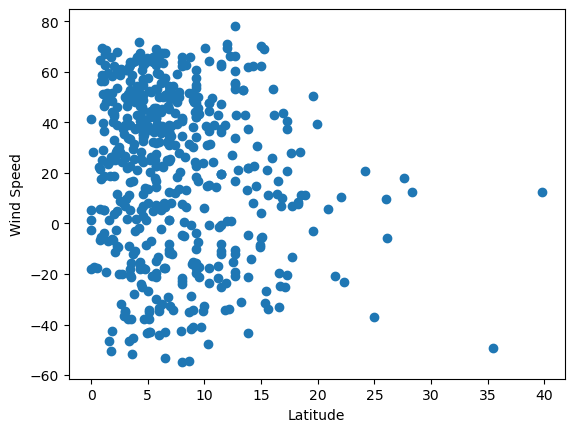

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
def linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,nagqu,31.5000,92.0000,39.96,94,100,3.78,CN,1690155203
4,thompson,55.7435,-97.8558,71.76,40,20,12.66,CA,1690155179
5,kodiak,57.7900,-152.4072,63.91,68,0,9.22,US,1690155194
8,college,64.8569,-147.8028,84.18,44,40,5.75,US,1690155386
10,longyearbyen,78.2186,15.6401,49.84,76,40,12.66,SJ,1690155173


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,52.18,82,89,5.99,ZA,1690155180
1,bredasdorp,-34.5322,20.0403,49.69,72,59,5.97,ZA,1690155179
2,suva,-18.1416,178.4415,78.28,69,75,3.44,FJ,1690155228
6,ushuaia,-54.8000,-68.3000,31.66,80,20,8.05,AR,1690155121
7,ancud,-41.8697,-73.8203,39.52,84,100,8.77,CL,1690155205


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.34501243408715043


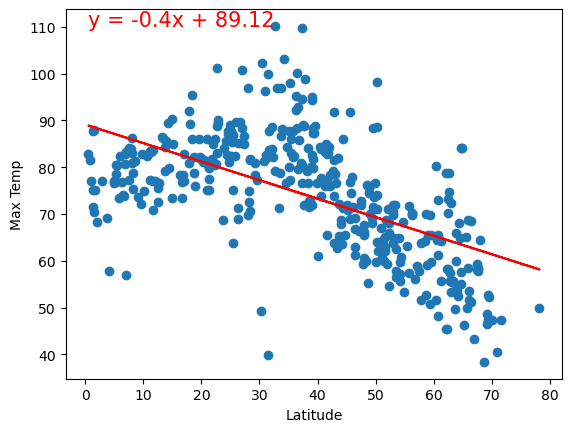

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
text_coordinates =(min(x_values), max(y_values))

linear_regression(x_values, y_values,"Max Temp",text_coordinates )

The r-squared is: 0.6982244260094982


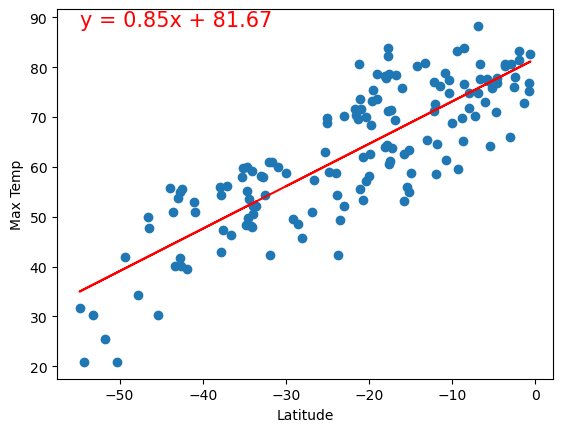

In [33]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
text_coordinates =(min(x_values), max(y_values))

linear_regression(x_values, y_values,"Max Temp",text_coordinates )

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The linear regression analysis for both hemispheres demonstrates the existence of a 
broad, predictable trend between latitude and maximum temperature

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00112979259866454


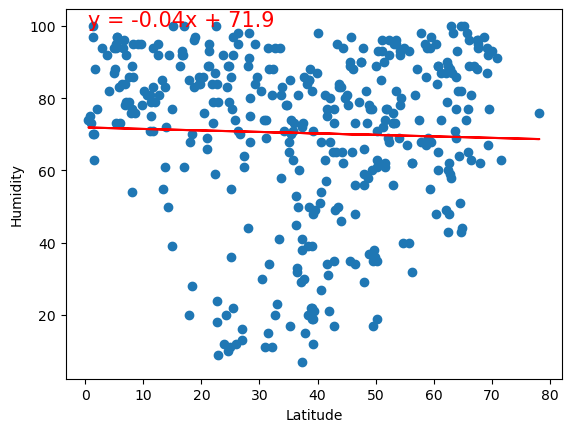

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
text_coordinates =(min(x_values), max(y_values))

linear_regression(x_values, y_values,"Humidity",text_coordinates )

The r-squared is: 0.014895660387824264


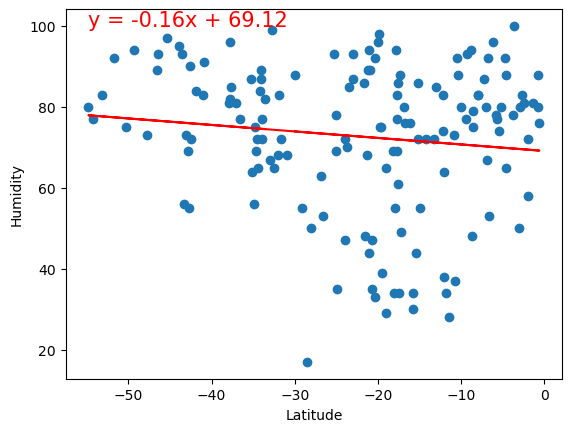

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
text_coordinates =(min(x_values), max(y_values))

linear_regression(x_values, y_values,"Humidity",text_coordinates )

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0037857996554639256


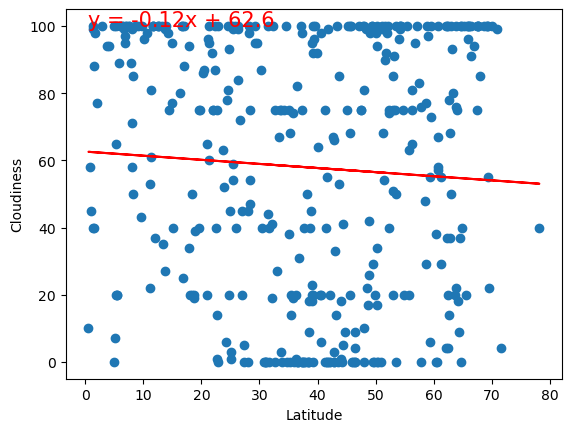

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
text_coordinates =(min(x_values), max(y_values))

linear_regression(x_values, y_values,"Cloudiness",text_coordinates )

The r-squared is: 0.05618166295462409


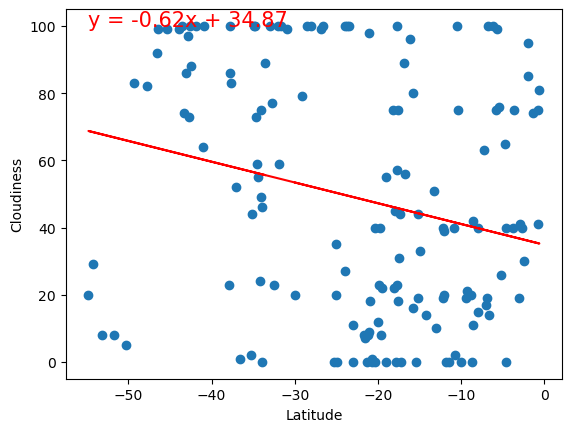

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
text_coordinates =(min(x_values), max(y_values))

linear_regression(x_values, y_values,"Cloudiness",text_coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.026136332722206657


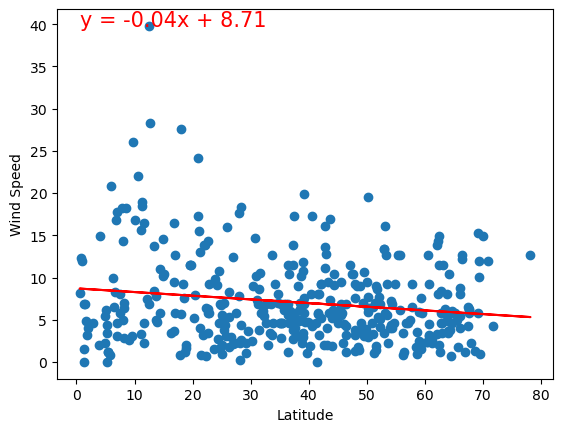

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
text_coordinates =(min(x_values), max(y_values))

linear_regression(x_values, y_values,"Wind Speed",text_coordinates)

The r-squared is: 0.00010195868987182059


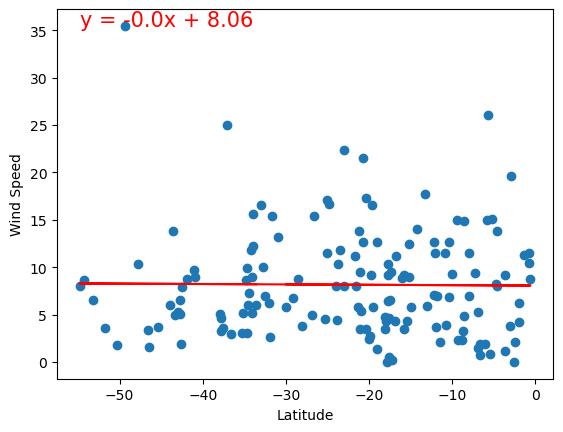

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
text_coordinates =(min(x_values), max(y_values))

linear_regression(x_values, y_values,"Wind Speed",text_coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE